# Análise Exploratória de Dados (EDA) da Cerreira Fosta Ltda.

## Problema a Ser Resolvido:
1. Quais características estão relacionadas ao sucesso das vendas?
2. Como a concorrência interfere no desempenho da empresa?
3. Existem fatores específicos que indicam que uma oportunidade tem maior chance de ser fechada?
4. O que pode ser feito para otimizar as vendas?



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Acessando o Drive que contém as bases de dados.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Caminho completo dos arquivos
path_base_atualizada = "/content/drive/My Drive/Pasta_PTA/base_padronizada.parquet"

# Carregando as bases de dados
base_atualizada = pd.read_parquet('/content/drive/MyDrive/Pasta_PTA/base_padronizada.parquet')

## 1. Quais características estão relacionadas ao sucesso das vendas?

Nesta etapa, vamos explorar os casos de maior sucesso de vendas das unidades da Cerreira Fosta Ltda..

Definimos um dia de sucesso como aquele em que uma unidade vendeu mais de 20.000 produtos. A partir dessa definição, analisamos os dados para identificar as características que mais contribuem para o sucesso das vendas, considerando fatores como tipo de loja, nível de sortimento, presença de promoções e sazonalidades. Essa análise nos ajudará a destacar os elementos determinantes para impulsionar os resultados e a direcionar estratégias futuras com base nas práticas mais eficazes.

In [4]:
# Filtrando os dados para incluir apenas dias com vendas acima de 20.000
vendas_altas = base_atualizada[base_atualizada['Sales'] > 20000]

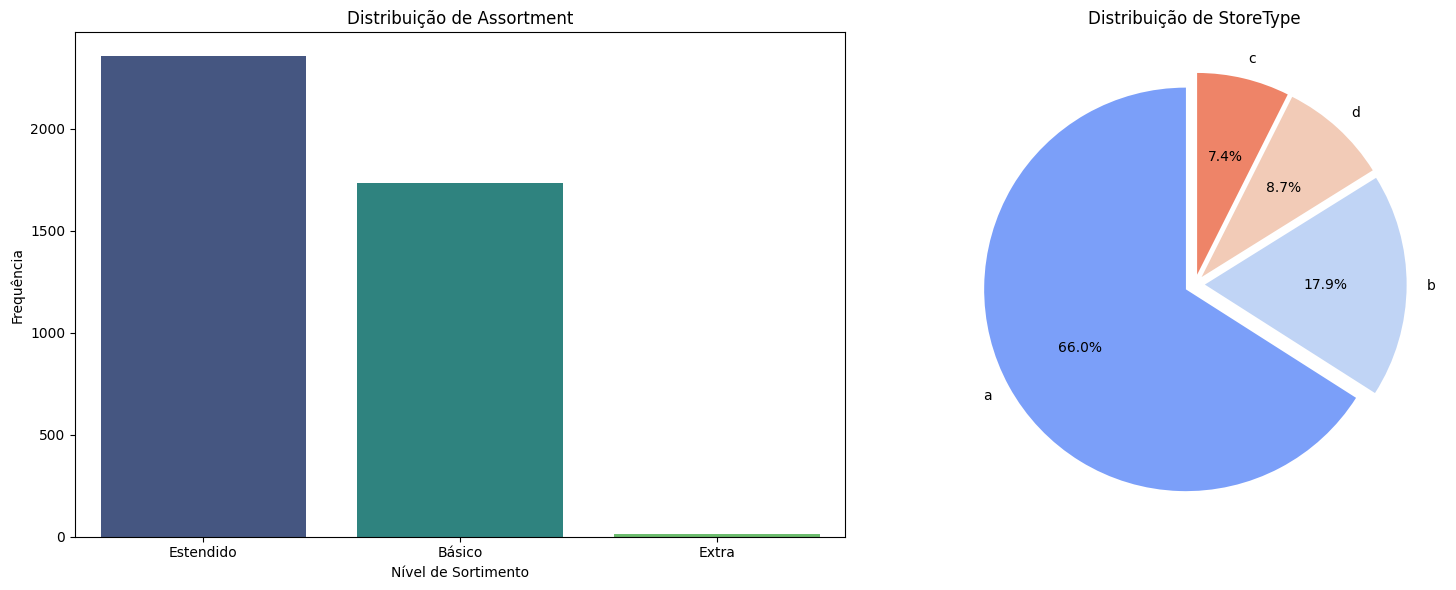

In [5]:
# Configurando subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras - Assortment
sns.countplot(data=vendas_altas, x='Assortment', palette='viridis', ax=axes[0], hue='Assortment', legend=False)
axes[0].set_title('Distribuição de Assortment')
axes[0].set_xlabel('Nível de Sortimento')
axes[0].set_ylabel('Frequência')

# Gráfico de pizza - StoreType
vendas_altas['StoreType'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('coolwarm', len(vendas_altas['StoreType'].unique())),
    explode=[0.05]*len(vendas_altas['StoreType'].unique()),
    ax=axes[1]
)
axes[1].set_title('Distribuição de StoreType')
axes[1].set_ylabel('')  # Remove o rótulo do eixo Y

# Ajustando o layout
plt.tight_layout()
plt.show()

**Insight:**

- Os gráficos filtrados para vendas acima de 20.000 revelam informações importantes sobre o desempenho das lojas. No gráfico de barras, observa-se que a maioria das lojas que alcançam vendas de sucesso possuem o nível de sortimento "Estendido". Isso indica que lojas com maior variedade de produtos tendem a apresentar melhores resultados de vendas. Em contrapartida, lojas com sortimento "Básico" têm menor frequência nas vendas altas, e o nível "Extra" é praticamente inexistente, sugerindo que ampliar o portfólio de produtos pode ser uma estratégia relevante para impulsionar as vendas.

- No gráfico de pizza, observa-se que 66% dos casos de sucesso nas vendas ocorrem em lojas do tipo "a", destacando o papel predominante desse formato no desempenho de vendas. Os tipos "b" e "d" têm participações menores, representando 17,9% e 8,7%, respectivamente, enquanto o tipo "c" aparece com apenas 7,4%. Esses dados sugerem que características específicas associadas às lojas do tipo "a", como localização estratégica, layout eficiente, maior capacidade de atendimento ou um público-alvo bem definido, são fatores cruciais para impulsionar o sucesso das vendas.


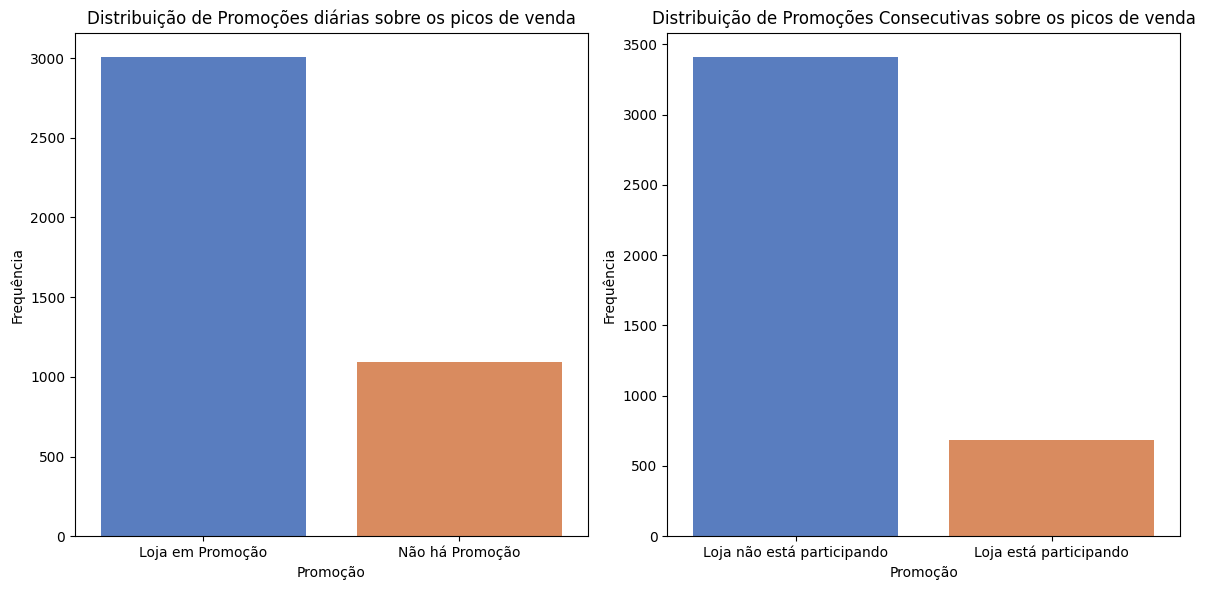

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=vendas_altas, x='Promo', palette='muted', hue='Promo', legend=False)
plt.title("Distribuição de Promoções diárias sobre os picos de venda")
plt.xlabel("Promoção")
plt.ylabel("Frequência")

plt.subplot(1, 2, 2)
sns.countplot(data=vendas_altas, x='Promo2', palette='muted', hue='Promo2', legend=False)
plt.title("Distribuição de Promoções Consecutivas sobre os picos de venda")
plt.xlabel("Promoção")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

**Insight:**
- No gráfico da distribuição de promoções diárias sobre os picos de venda, é evidente que os dias em que as lojas estão em promoção apresentam uma frequência muito maior de picos de vendas em comparação aos dias sem promoções. Isso indica uma correlação positiva entre a realização de promoções e o aumento significativo de vendas, destacando a importância dessas estratégias para atrair mais consumidores e impulsionar resultados.

- O gráfico da distribuição de promoções consecutivas sobre os picos de venda mostra que a participação em promoções consecutivas tem impacto menor no número de picos de vendas, comparado às lojas que não estão em promoção consecutiva. Isso pode sugerir que, embora promoções consecutivas ainda gerem impacto positivo, seu efeito tende a diminuir com o tempo, possivelmente devido à saturação dos consumidores ou à percepção de perda de exclusividade nas ofertas.


## 2. Como a concorrência interfere no desempenho da empresa?
Nesta etapa, o objetivo é compreender como a concorrência afeta o desempenho das unidades da Cerreira Fosta Ltda. e identificar os fatores que podem ser mitigados ou explorados para melhorar os resultados.

Para começar, vamos agrupar as distâncias para ficar mais organizado e intuitivo.

In [7]:
# Criar faixas para a coluna CompetitionDistance
base_atualizada['CompetitionDistance_bins'] = pd.cut(
    base_atualizada['CompetitionDistance'].replace(' ', 0).astype(float),
    bins=[0, 1000, 5000, 10000, 20000, float('inf')],
    labels=['0-1k', '1k-5k', '5k-10k', '10k-20k', '20k+'])

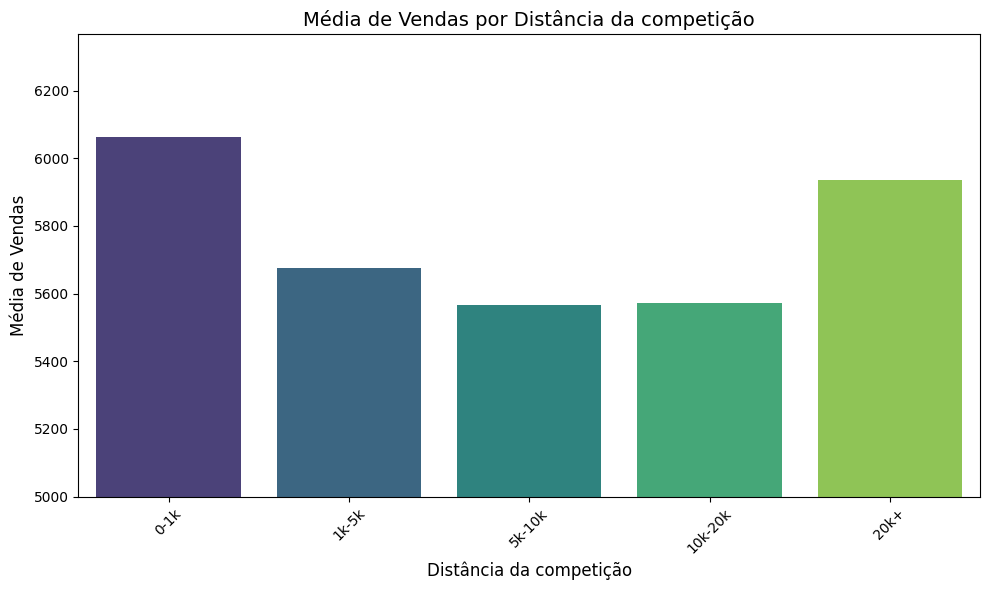

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=base_atualizada, x='CompetitionDistance_bins', y='Sales', errorbar=None, palette="viridis", hue='CompetitionDistance_bins', legend=False)
plt.title("Média de Vendas por Distância da competição", fontsize=14)
plt.xlabel('Distância da competição', fontsize=12)
plt.ylabel('Média de Vendas', fontsize=12)
plt.ylim(bottom=5000)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

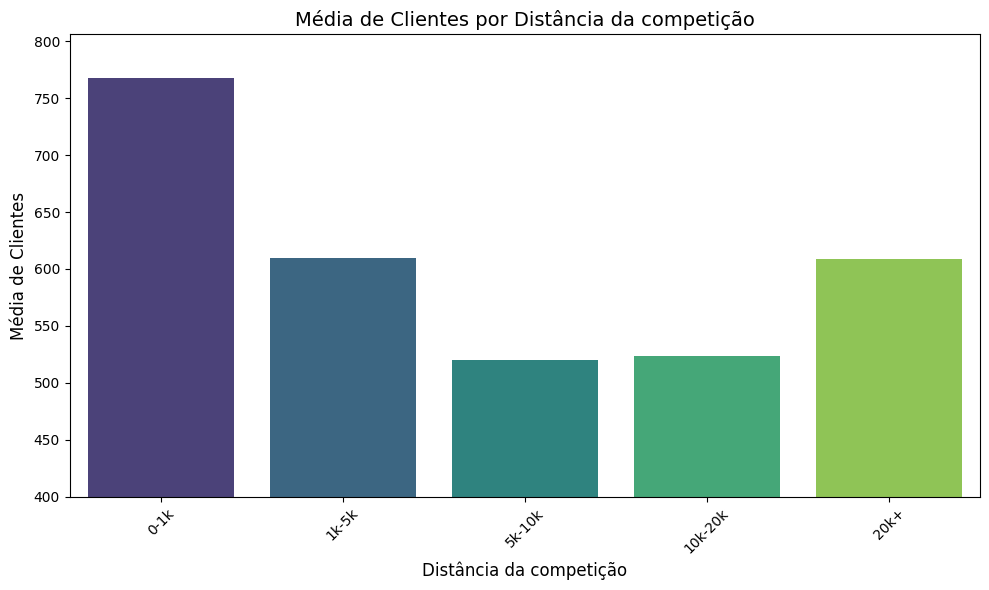

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=base_atualizada, x='CompetitionDistance_bins', y='Customers', errorbar=None, palette="viridis", hue='CompetitionDistance_bins', legend=False)
plt.title("Média de Clientes por Distância da competição", fontsize=14)
plt.xlabel('Distância da competição', fontsize=12)
plt.ylabel('Média de Clientes', fontsize=12)
plt.ylim(bottom=400)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**

- O gráfico evidencia que as lojas situadas a uma distância de 0 a 1 km de seus concorrentes possuem a maior média de clientes atendidos, ultrapassando 750 por dia. Esse dado reflete o impacto positivo do fenômeno de clustering, em que a proximidade imediata com concorrentes atrai mais consumidores devido à conveniência e validação do local como um ponto de alta atratividade. Em contrapartida, lojas localizadas entre 1 e 20 km apresentam uma redução na média de clientes atendidos, sugerindo que a dispersão geográfica pode reduzir a atratividade e dificultar o acesso do público.

- Esse comportamento está alinhado com a teoria de Hotelling’s Model of Spatial Competition, que explica o agrupamento estratégico de concorrentes em áreas de alto fluxo de clientes. Lojas próximas tendem a aproveitar o fluxo já existente, reduzindo riscos e aumentando as chances de captar consumidores. No entanto, essa estratégia também exige diferenciação, como ofertas promocionais, melhoria na experiência do cliente ou diversificação de produtos, para se destacar em um ambiente competitivo.

- Para lojas em áreas mais remotas, onde a concorrência é menor, é crucial desenvolver estratégias específicas que compensem a falta de proximidade com outros estabelecimentos. Isso pode incluir ações de marketing direcionadas e serviços exclusivos que atraiam o público e fortaleçam o apelo local.



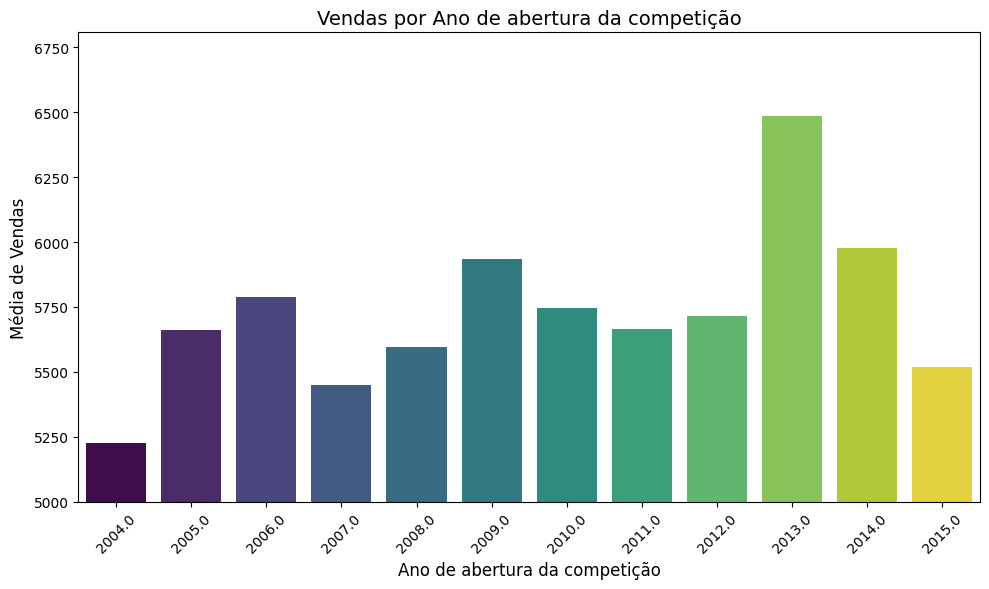

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=base_atualizada, x='CompetitionOpenSinceYear', y='Sales', errorbar=None, palette="viridis", hue='CompetitionOpenSinceYear', legend=False)
plt.title("Vendas por Ano de abertura da competição", fontsize=14)
plt.xlabel('Ano de abertura da competição', fontsize=12)
plt.ylabel('Média de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(bottom=5000)
plt.tight_layout()
plt.show()

**Insight:**
- O gráfico revela uma correlação interessante entre o ano de abertura da concorrência e o desempenho das unidades da Cerreira Fosta. Unidades localizadas próximas a concorrentes mais estabelecidos, ou seja, que abriram antes de 2012, apresentam desempenho inferior em vendas, possivelmente devido à presença consolidada desses concorrentes no mercado e à fidelização de clientes em suas bases. Por outro lado, lojas próximas a concorrentes mais recentes (abertos a partir de 2012) registram vendas mais altas. Isso pode ser explicado pelo menor impacto inicial que novos concorrentes exercem no mercado ou pela oportunidade de as lojas da Cerreira Fosta aproveitarem sua presença prévia para capturar clientes antes que a concorrência se estabeleça totalmente.




## 3. Existem fatores específicos que indicam que uma oportunidade tem maior chance de ser fechada?

Nesta etapa, exploraremos as características associadas às oportunidades com maior probabilidade de sucesso na Cerreira Fosta Ltda. Com isso, será possível identificar os indicadores mais relevantes para prever o fechamento de oportunidades e melhorar a precisão na priorização de esforços da equipe de vendas.

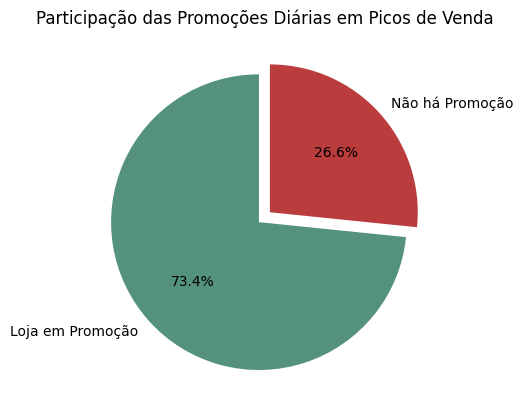

In [11]:
# Plotando o gráfico de pizza
plt.pie(
    vendas_altas['Promo'].value_counts(),
    labels=vendas_altas['Promo'].value_counts().index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette(['#54927d', '#ba3c3c']),
    explode=[0.05]*len(vendas_altas['Promo'].unique()),
)

plt.title('Participação das Promoções Diárias em Picos de Venda')
plt.show()

**Insight:**


- O gráfico de pizza mostra que 73,4% dos picos de venda ocorrem em dias em que as lojas estão em promoção, enquanto apenas 26,6% acontecem em dias sem promoções. Isso evidencia o impacto significativo das promoções como um catalisador para o aumento das vendas, sendo responsável pela grande maioria dos picos. Esse resultado reforça a ideia de que as promoções diárias têm um impacto significativo nas chances de oportunidades fechadas.

In [12]:
# Ordenando os dias da semana
ordem_dias = ['Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo']

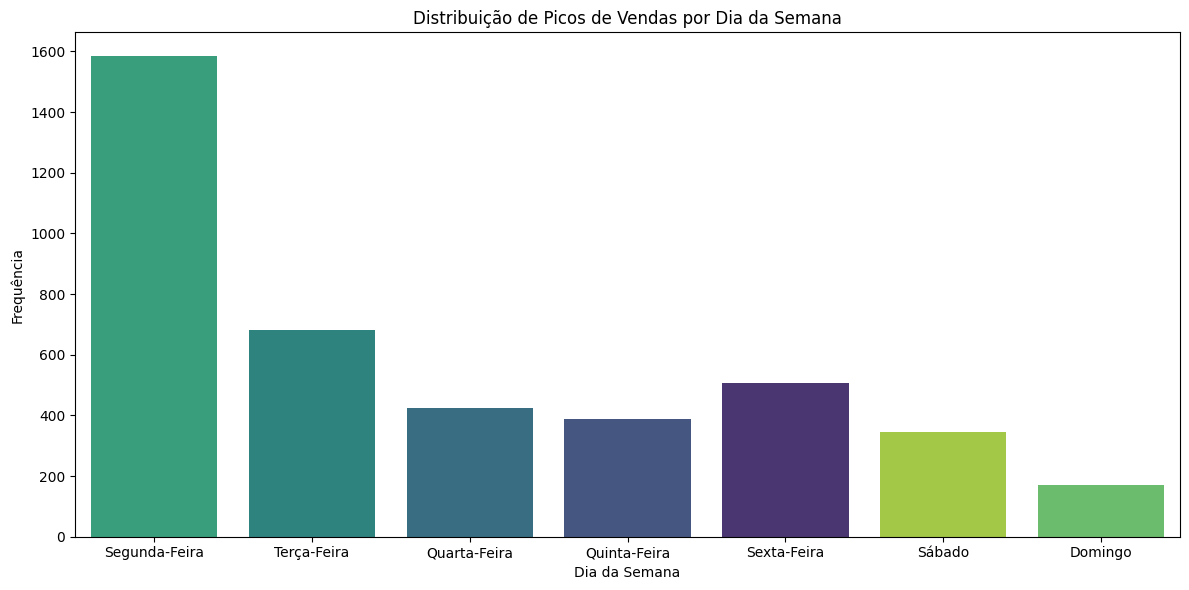

In [13]:
# Plotando o gráfico de barra
plt.figure(figsize=(12, 6))

sns.countplot(data=vendas_altas, x='DayOfWeek', palette='viridis', order=ordem_dias, hue='DayOfWeek')
plt.title('Distribuição de Picos de Vendas por Dia da Semana')
plt.ylabel("Frequência")
plt.xlabel("Dia da Semana")

plt.tight_layout()
plt.show()

**Insight:**

- O gráfico mostra a distribuição dos picos de vendas ao longo dos dias da semana. Os resultados indicam que segunda-feira é o dia com o maior número de picos de vendas, representando uma concentração significativamente maior em comparação com os demais dias. Esse comportamento pode estar relacionado a fatores como o início da semana, quando clientes podem buscar renovar estoques ou aproveitar promoções lançadas no final de semana anterior.

- Outros dias da semana, como sexta-feira e terça-feira, também apresentam frequência relevante, embora substancialmente menor que a de segunda-feira. Já os dias de final de semana, especialmente domingo, possuem o menor número de picos de vendas. Esse padrão pode indicar uma oportunidade para ajustar estratégias de marketing e operações nesses dias, aumentando o fluxo de clientes e otimizando vendas em períodos com menor desempenho.


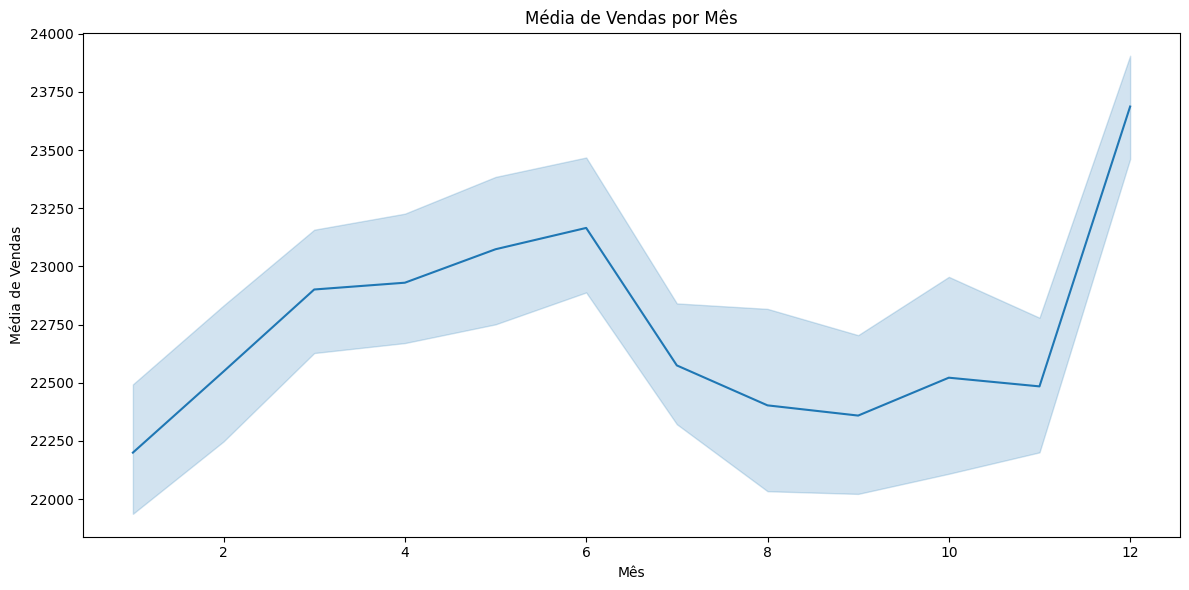

In [14]:
plt.figure(figsize=(12, 6))

# gráfico de linha sobre a média de vendas por mês baseado no pico de vendas
sns.lineplot(data=vendas_altas, x='Meses', y='Sales', )
plt.title('Média de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Vendas')

plt.tight_layout()
plt.show()

**INSIGHT:**

- O gráfico mostra a média de vendas por mês nos dias em que as vendas superaram 20.000, evidenciando um padrão sazonal ao longo do ano. As vendas apresentam crescimento consistente entre os meses de fevereiro e junho, atingindo um pico em junho. No entanto, a partir de julho, observa-se uma queda acentuada, que se estabiliza em valores baixos até outubro. Em contraste, novembro apresenta uma recuperação, culminando em um pico significativo em dezembro.

- Portanto, é interessante analisar os direcionamentos realizados nos meses de junho e dezembro a fim de replicar para os outros meses.

## 4. O que pode ser feito para otimizar as vendas?

Nesta etapa, o foco será identificar as ações que podem ser implementadas para melhorar o desempenho das vendas na Cerreira Fosta Ltda com base nas análises realizadas.

### Plano de Ação (Características Principais)

 - A Cerreira Fosta deve intensificar as promoções diárias, considerando que estas possuem mais influência do que as promoções consecutivas e além de que mais de dois terços das vendas de sucesso estão associadas a campanhas promocionais. Para maximizar o impacto, seria interessante avaliar a eficácia de diferentes tipos de promoções e identificar quais produtos têm maior sensibilidade a essas ações. Isso pode ajudar a empresa a planejar campanhas promocionais mais assertivas, otimizando os lucros e o volume de vendas.

 - A empresa pode explorar estratégias para potencializar ainda mais as vendas nas segundas-feiras, como lançamentos de promoções específicas, campanhas publicitárias direcionadas, ou reforço de estoque. Além disso, investir em ações promocionais ou eventos específicos para atrair clientes nos dias de sábado, que apresentam menor número de picos, pode ajudar a equilibrar o desempenho ao longo da semana e maximizar os resultados.

 - A empresa pode revisar o portfólio de produtos e ampliar o sortimento em outras lojas. Além disso, é possível priorizar investimentos nas lojas do tipo "a", que mostram maior potencial de vendas, enquanto uma análise mais detalhada das lojas dos tipos "b", "c" e "d" pode ajudar a identificar barreiras de desempenho e propor melhorias estratégicas.

 - A Cerreira Fosta deve concentrar esforços nos meses de junho e dezembro por meio de aumento de estoque e campanhas direcionadas para garantir que a empresa esteja bem preparada para atender à demanda.




### Plano de Ação (Concorrentes).

- Com base nos insights, recomenda-se que a Cerreira Fosta considere expandir suas operações em áreas de alta concentração de concorrentes, monitorando cuidadosamente o desempenho e buscando diferenciação. Em regiões mais afastadas, o foco deve estar na criação de um forte apelo local e na identificação de nichos de mercado. Essas abordagens, baseadas em dados, podem ajudar a empresa a maximizar seu alcance e melhorar o desempenho em vendas.

- Com base nos insights obtidos, para unidades próximas a concorrentes antigos, é essencial investir em diferenciação, estratégias de fidelização e promoções atrativas para enfrentar a competição consolidada. Já em áreas com concorrência recente, estratégias que solidifiquem rapidamente a base de clientes e fortaleçam a percepção de marca podem ser fundamentais para manter a vantagem competitiva inicial. Esses insights ajudam a direcionar estratégias específicas para melhorar o desempenho em diferentes contextos de competição.
